# **Detector de Máscaras para COVID-19 - usando CNN**

## Introdução

A quarentena realmente dificultou as coisas para nós. E com o aumento dos casos de coronavírus em todo o mundo, as máscaras tornaram-se necessárias, ou melhor, obrigatórias. 

Qualquer pessoa que viajar de ônibus, trem, balsa ou avião deve usar uma cobertura facial para ajudar a reduzir o risco de transmissão do coronavírus.

As novas regras coincidiram com um maior abrandamento do bloqueio em diferentes países - incluindo o regresso às aulas dos alunos das escolas e a reabertura das lojas.

A fim de ajudar a conter a propagação e identificar indivíduos que não seguem as políticas de segurança, pretendemos construir uma detector de máscara facial baseada em Rede Neural de Convolução (Convulational Neural Network - CNN).

## Objetivo

Vamos analisar imagens e identificar se as pessoas estão usando máscara ou não. O ojetivo é criar um detector de máscara, classificador ou aplicativos de câmera em tempo real.

## Dataset

O conjunto de dados a ser usado contém quase 12 mil imagens de casos em que as pessoas estão com e sem máscara facial.

Link do dataset: <a href="https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset" target="_blanck">Kaggle - Face Mask Detection ~12K Images Dataset<a/> 

## 1. Importando as Bibliotecas e as Imagens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# diretório onde estão as pastas com as imagens
train_dir = "../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/"
validation_dir = "../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/"
test_dir  = "../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/"

In [3]:
# cria geradores de imagens para vetorizar as imagens

train_generator = ImageDataGenerator(rescale=1./255)

test_generator = ImageDataGenerator(rescale=1./255)

validation_generator = ImageDataGenerator(rescale=1./255)

In [4]:
# carrega as imagens nos conjuntos de treino,teste e validação

train_images = train_generator.flow_from_directory(
        train_dir,
        target_size=(155,155),
        batch_size=32,
        color_mode='rgb',    
        shuffle=True,
        seed=42,        
        class_mode='binary',
        )

test_images = test_generator.flow_from_directory(
        test_dir,
        target_size=(155,155),
        batch_size=32,
        color_mode='rgb',    
        shuffle=False,
        seed=42,
        class_mode='binary',
        )

validation_images = validation_generator.flow_from_directory(
        validation_dir,
        target_size=(155,155),
        batch_size=32,
        color_mode='rgb',    
        shuffle=True,
        seed=42,
        class_mode='binary',
        )



Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## 2. Construindo o Modelo

In [6]:
# entrada 
inputs = tf.keras.Input(shape=(155,155, 3))

# 1°camada convolucional
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
# 2°camada convolucional
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# camadas totalmente conectadas
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

#saída
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# une as entradas,camadas,e saída
model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 155, 155, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 153, 153, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080  

In [7]:
# cria o modelo
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

## Treinando o Modelo

In [8]:
# treina o modelo
history = model.fit(train_images,epochs=30, validation_data=validation_images)

Epoch 1/30
313/313 [==============================] - 57s 169ms/step - loss: 0.5465 - accuracy: 0.7065 - val_loss: 0.3514 - val_accuracy: 0.8637
Epoch 2/30
313/313 [==============================] - 26s 83ms/step - loss: 0.3355 - accuracy: 0.8717 - val_loss: 0.4306 - val_accuracy: 0.8075
Epoch 3/30
313/313 [==============================] - 26s 82ms/step - loss: 0.3274 - accuracy: 0.8704 - val_loss: 0.2968 - val_accuracy: 0.8900
Epoch 4/30
313/313 [==============================] - 25s 81ms/step - loss: 0.2879 - accuracy: 0.8899 - val_loss: 0.2777 - val_accuracy: 0.8950
Epoch 5/30
313/313 [==============================] - 26s 82ms/step - loss: 0.3016 - accuracy: 0.8860 - val_loss: 0.3435 - val_accuracy: 0.8625
Epoch 6/30
313/313 [==============================] - 25s 81ms/step - loss: 0.2913 - accuracy: 0.8878 - val_loss: 0.3042 - val_accuracy: 0.8863
Epoch 7/30
313/313 [==============================] - 25s 81ms/step - loss: 0.2581 - accuracy: 0.9041 - val_loss: 0.2729 - val_accuracy

## 3. Avaliando o Modelo

In [9]:
results = model.evaluate(test_images, verbose=0)
print("    Perda: {:.5f}".format(results[0]))
print("Acurácia: {:.3f}%".format(results[1] * 100))

    Perda: 0.16669
Acurácia: 93.750%


Obtemos uma acurácia de mais de 93% do modelo em classificar as imagens do conunto de teste

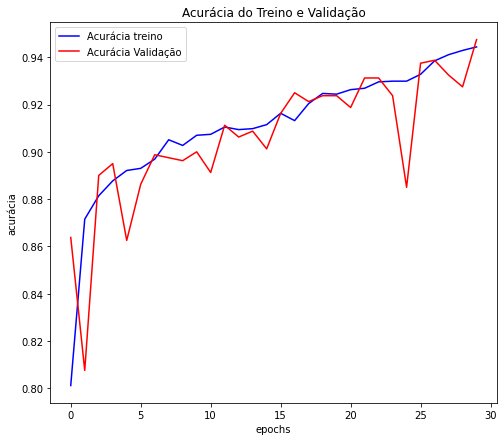

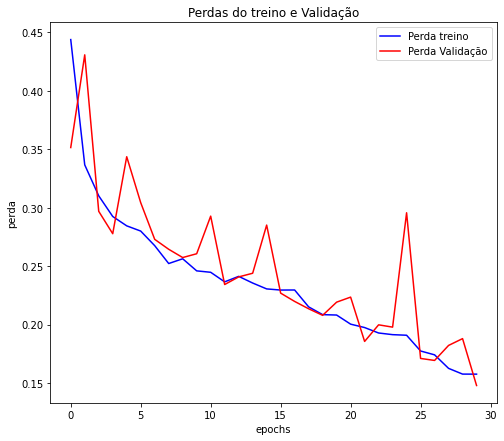

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.figure(figsize=(8,7))
plt.plot(epochs, acc, 'b', label='Acurácia treino')
plt.plot(epochs, val_acc, 'r', label='Acurácia Validação')
plt.title('Acurácia do Treino e Validação')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
 
plt.figure(figsize=(8,7))
plt.plot(epochs, loss, 'b', label='Perda treino')
plt.plot(epochs, val_loss, 'r', label='Perda Validação')
plt.title('Perdas do treino e Validação')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('perda')
 
plt.show()

Nos gráficos acima vemos as acurácias e as funções de perdas, tanto do conjunto de treino quanto para o de validação. o mais importante delas é que a acurácia aumente e a perda dimunua conforme aumentamos a variável epochs, responsável pela quantidade de vezes que o modelo é treinado.

## 4. Visualizando os Resultados

Por fim, vamos visualizar diretamente como o modelo detecta/classifica as imagens. 

Para fazer isso criamos duas etapas, primeiro ver se o modelo detecta as máscaras faciais, nomeando as imagem em "Sem Máscara" ou "Máscara". Depois comparamos se a classificação foi correta com o esperado, escrevendo a legenda em azul (classificação correta) ou em vermelho (classificação errada).

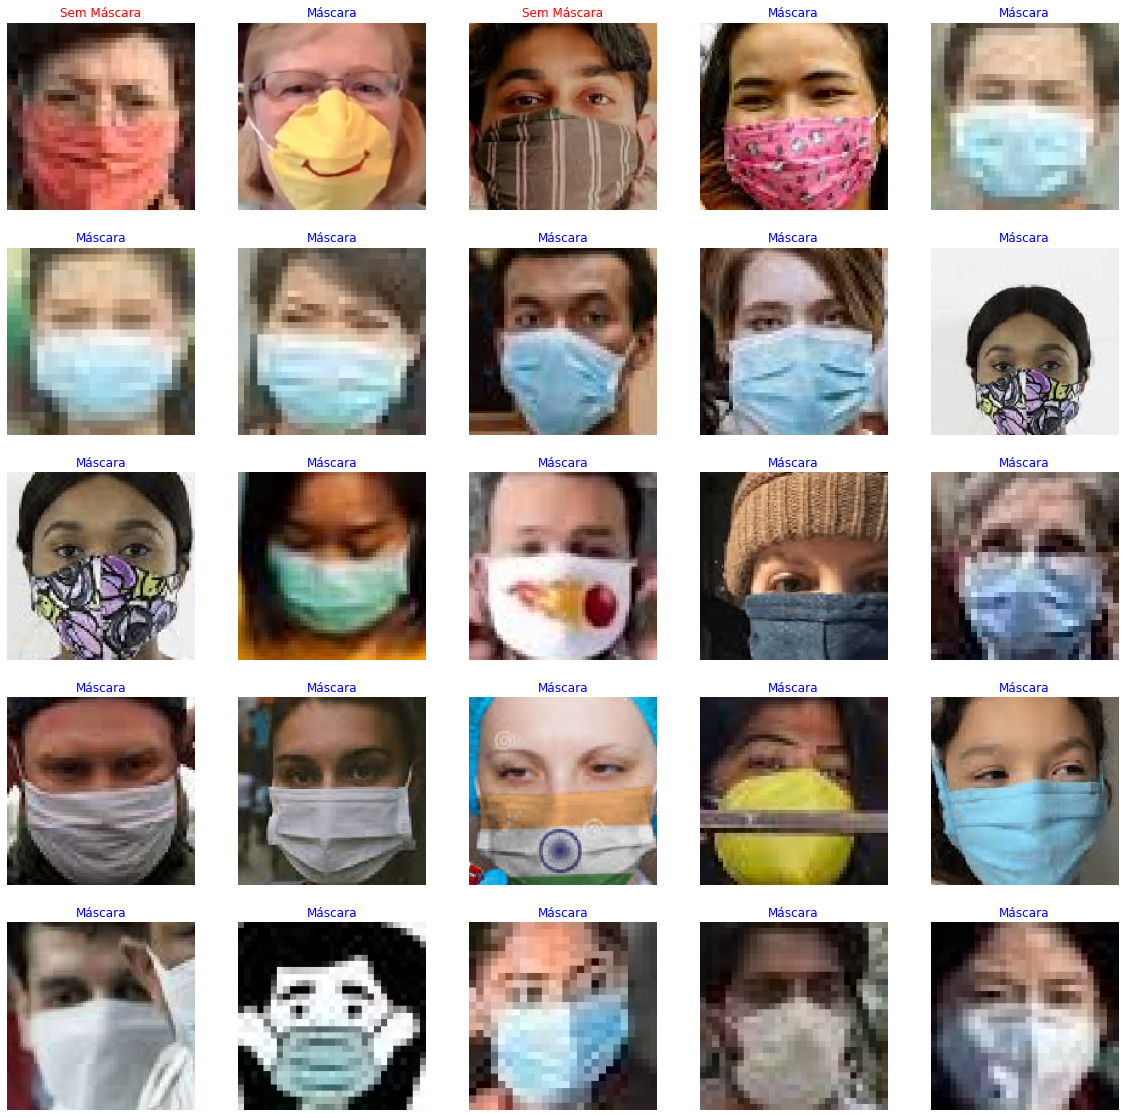

In [12]:
samples = test_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
label = samples[1].astype(np.int)

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("Sem Máscara" if predictions[i] == 1 else "Máscara"), 
              color=('blue' if label[i] == predictions[i] else 'red'))

plt.show()

## 5. Conclusão

**Atingimos o objetivo do projeto, criamos um detector de máscara facial que pode se usado em câmeras para identificar se as pessoas estão usando ou não máscara facial, acertendo em de mais de 93%.**